In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("aqardata_2.csv")

In [3]:
print(data.shape)

(2951, 8)


# 1- Data analysis & Preprocessing

In [4]:
data.describe()

,streetwidth,size,Pricepm
count,2948.000000,2.951000e+03,2951.000000
mean,24.691995,1.040184e+04,2624.025754
std,15.208720,2.033230e+05,2970.544618
min,1.000000,8.100000e+01,1.000000
25%,15.000000,5.750000e+02,1200.000000
50%,20.000000,8.250000e+02,2600.000000
75%,30.000000,1.350000e+03,3500.000000
max,100.000000,1.000000e+07,83333.000000


## 1.1- Missing values

In [5]:
data.isna().sum()

mainlocation      0
sublocation     675
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

In [6]:
print(f"The percentage of nall values in:")
print(f"'sublocation'= {data.sublocation.isna().sum() / data.shape[0]}")
print(f"'purpose'= {data.purpose.isna().sum() / data.shape[0]}")
print(f"'streetwidth'= {data.streetwidth.isna().sum() / data.shape[0]}")


The percentage of nall values in:
'sublocation'= 0.22873602168756355
'purpose'= 0.11758725855642155
'streetwidth'= 0.0010166045408336157


In [7]:
data.sublocation.fillna("not know",inplace=True)
data.purpose.fillna("not know",inplace=True)
data.dropna(inplace=True)

data.shape

(2948, 8)

## 1.2- Outliers

array([[<AxesSubplot:title={'center':'streetwidth'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'Pricepm'}>, <AxesSubplot:>]],
      dtype=object)

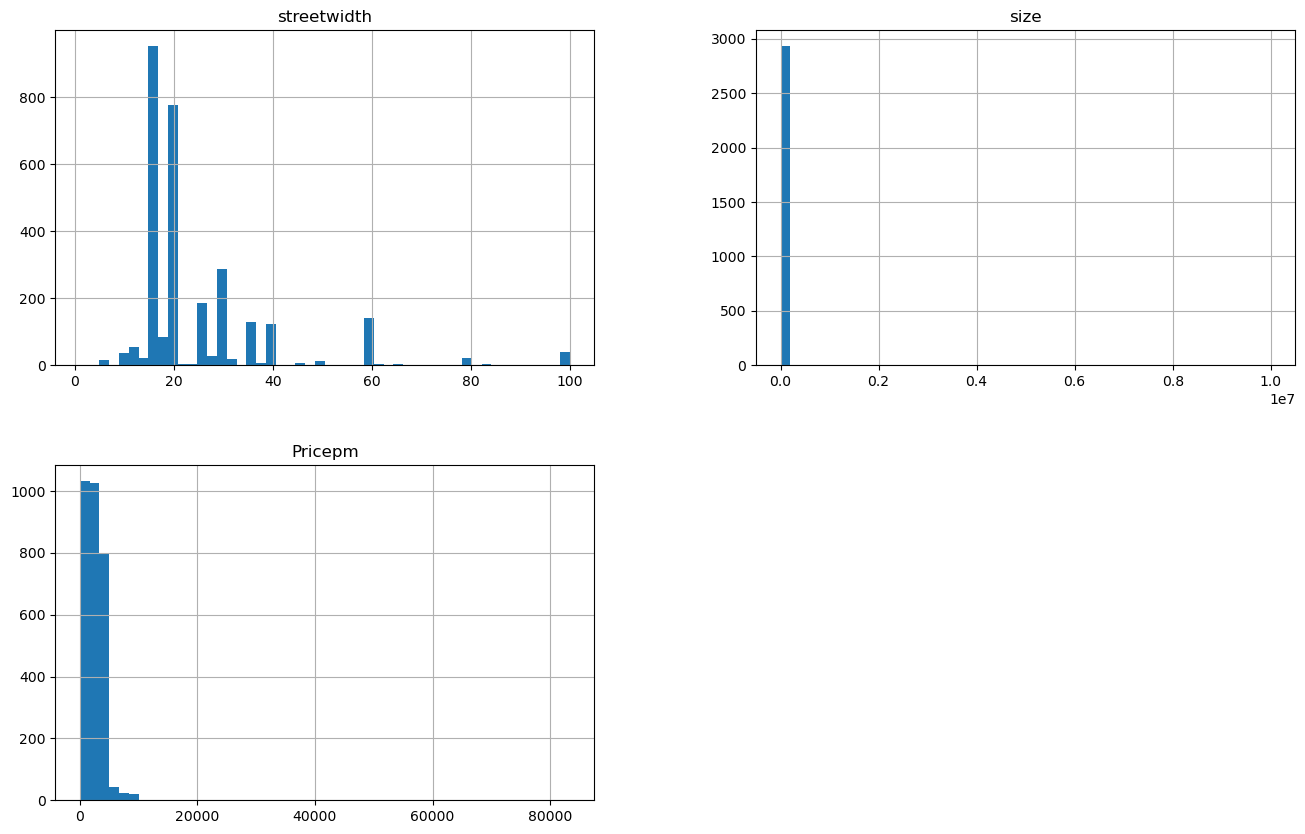

In [8]:
data.hist(figsize=(16,10),bins=50)

<AxesSubplot:>

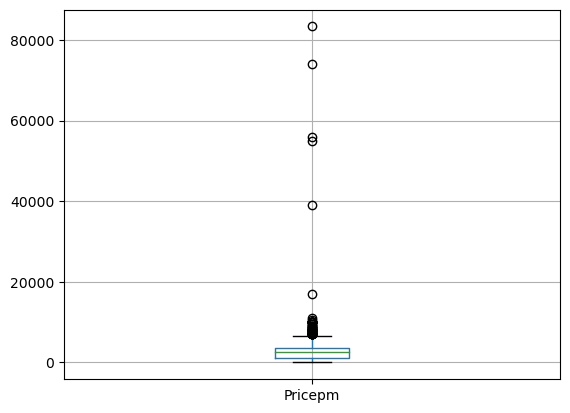

In [9]:
data.boxplot("Pricepm")

### >There are outliers in 'Pricepm'

<AxesSubplot:>

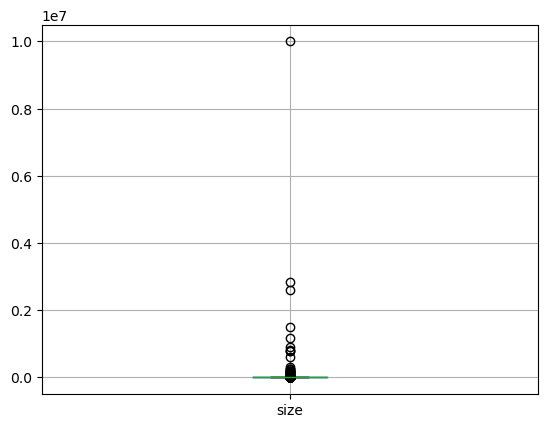

In [10]:
data.boxplot("size")

### >There are outliers in 'size'

<AxesSubplot:>

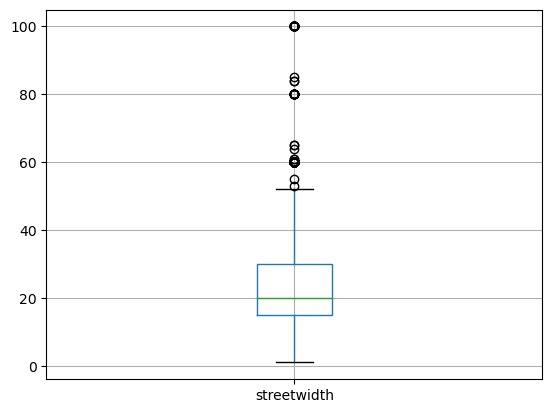

In [11]:
data.boxplot("streetwidth")

In [12]:
def removeOutliers(data,ft,min_t,max_t):
    min_threshold,max_threshold = data[ft].quantile([min_t,max_t]);

    print(f"min_threshold ={min_threshold}\nmax_threshold = {max_threshold}")

    return data[(data[ft]>min_threshold) & (data[ft]<max_threshold)]

### removing outliers based on "Pricepm"

In [13]:
cleanData = removeOutliers(data,"Pricepm",0.05,0.95)

min_threshold =315.7
max_threshold = 4700.0


<AxesSubplot:>

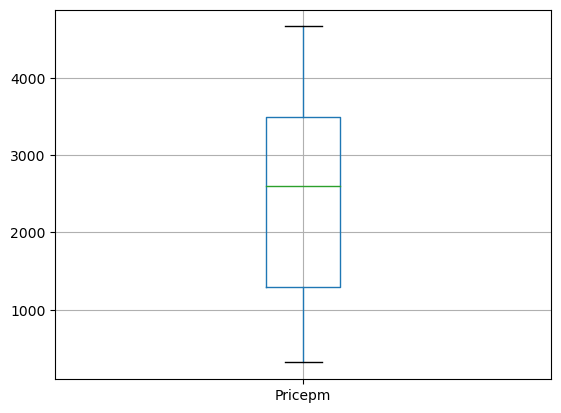

In [14]:
cleanData.boxplot("Pricepm")

### removing outliers based on "size"

In [15]:
cleanData = removeOutliers(cleanData,"size",0.10,0.73)

min_threshold =400.0
max_threshold = 1155.0


<AxesSubplot:>

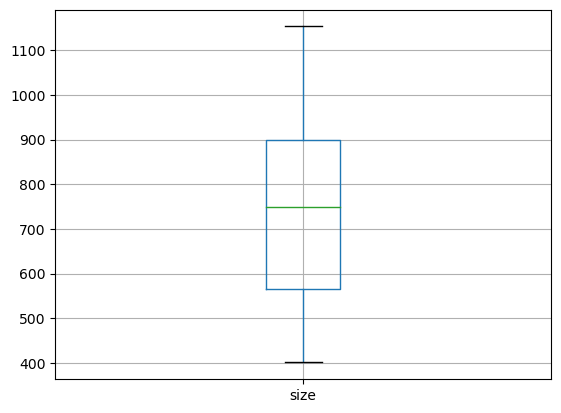

In [16]:
cleanData.boxplot("size")

In [17]:
cleanData = cleanData[(cleanData.streetwidth>=10) & (cleanData.streetwidth<=40)]

### removing outliers based on "streetwidth"

<AxesSubplot:>

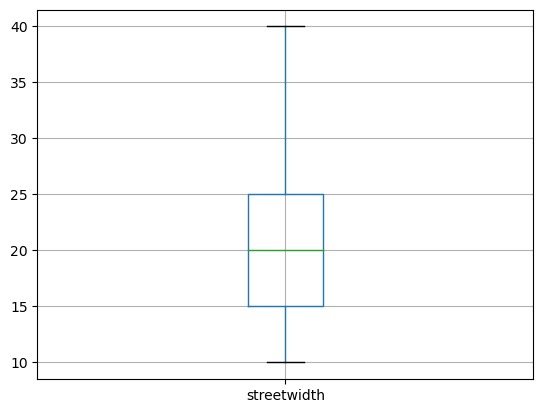

In [18]:
cleanData.boxplot("streetwidth")

## Cleaned Data

In [19]:
cleanData.describe()

,streetwidth,size,Pricepm
count,1577.000000,1577.000000,1577.000000
mean,20.589727,727.134432,2341.183259
std,7.110511,193.823369,1223.283749
min,10.000000,401.000000,317.000000
25%,15.000000,560.000000,1190.000000
50%,20.000000,744.000000,2400.000000
75%,25.000000,900.000000,3350.000000
max,40.000000,1153.000000,4666.000000


array([[<AxesSubplot:title={'center':'streetwidth'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'Pricepm'}>, <AxesSubplot:>]],
      dtype=object)

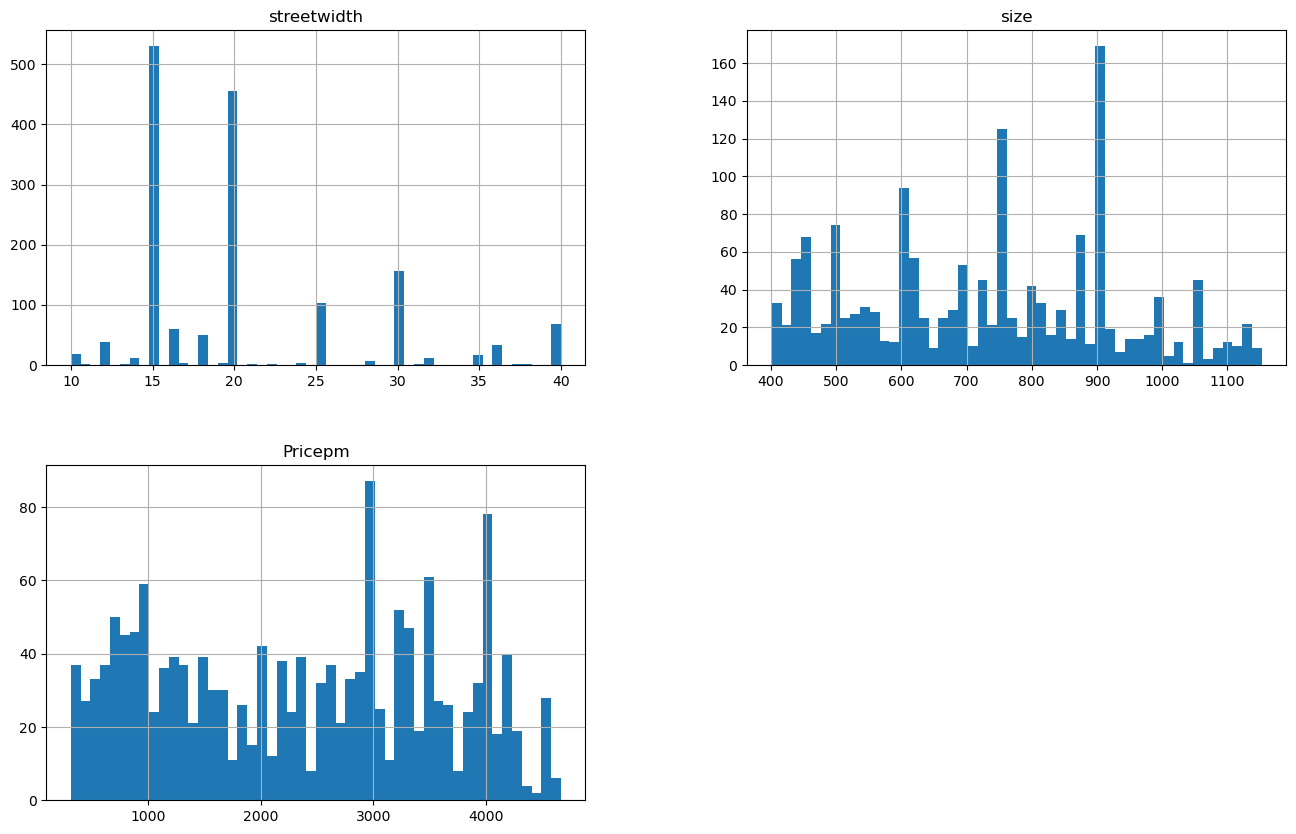

In [20]:
cleanData.hist(figsize=(16,10),bins=50)

## 1.3- One Hot encoding

In [21]:
cleanData = pd.get_dummies(cleanData)

 ## 1.4- Splitting

In [22]:
X = cleanData.drop(["Pricepm"],axis=1)
y = cleanData["Pricepm"]
X

,streetwidth,size,mainlocation_ابها,mainlocation_ابو عريش,mainlocation_احد رفيده,mainlocation_الخبر,mainlocation_الخرج,mainlocation_الدرعية,mainlocation_الدلم,mainlocation_الدمام,...,frontage_شرق,frontage_شمال,frontage_شمال شرقي,frontage_شمال غربي,frontage_غرب,purpose_not know,purpose_تجاري,purpose_سكني,purpose_سكني أو تجاري,purpose_غير محدد
0,20.0,727,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,15.0,450,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,15.0,440,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,40.0,784,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,20.0,660,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,15.0,870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2942,13.0,750,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2944,30.0,600,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2948,15.0,934,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [24]:
kf = KFold(n_splits=5,random_state=22,shuffle=True)
kf

KFold(n_splits=5, random_state=22, shuffle=True)

# 2- Model Training & Testing

In [25]:
def cv(model,X,KFoldInstant):
    # return the mean of [MAE,RMSE,R2]

    mae = []
    rmse = []
    r2 = []
    for train_index,test_index in KFoldInstant.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train,y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train,y_train)

        y_pred = model.predict(X_test)

        mae.append(mean_absolute_error(y_test,y_pred))
        rmse.append(np.sqrt(mean_squared_error(y_test,y_pred) ) )
        r2.append(r2_score(y_test,y_pred))

    return np.mean(mae),np.mean(rmse),np.mean(r2)

In [26]:
from sklearn.ensemble import RandomForestRegressor
cv(RandomForestRegressor(n_estimators=100),X,kf)

(251.07816288240193, 397.6707407777969, 0.893793910178392)

In [27]:
cleanData.shape

(1577, 249)